## Project Pipeline

* Student name: Tom Cheng, Aidi Li, Jesse Zhai, Andy Zhou, Grey Zhang
* Scheduled project review date: 25 July 2019
* Instructor name: Pro.pavlos protopapas, Patrick Ohiomoba and Esteban Reyes



# Contents

[1. Introduction and project aims](#1.Introduction-and-project-aims)

[2. The dataset](#2.The-dataset)

[3. Cleaning and pre-processing](#3.Cleaning-and-pre-processing)

[4. Exploratory data analysis](#4-Exploratory-data-analysis)

[5. Training Model](#5-Training-Model)


# 1.Introduction and project aims

Residential renting is an important process in most of the communities. Some slight differences in the prices might cause severe affections on people’s life. Because of the huge amount of data, the pricing process is not short nor simple. The aim of this project is to use machine learning algorithms to create the best model that predicts property rental prices in Washington D.C. downtown.

# 2.The dataset

The dataset comes from [InsideAirbnb](http://insideairbnb.com). The dataset was scraped on 15 July 2019 and contains information on all Washington D.C. Airbnb listings that were live on the site on that date. The data is disorganized, with a lot of null values and useless features. For example, some data are set by the hosts who do not know much about Airbnb, and therefore cannot be used. However, the dataset have some really good features, so we need to clean the data initially.

# 3.Cleaning and pre-processing

In [1]:
# Importing the libraries and data
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose
import missingno
from sklearn.linear_model import LinearRegression
from keras import models
from keras import layers
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

Using TensorFlow backend.
C:\Users\77350\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### 3.1 Read data and check it

In [2]:
raw_df = pd.read_csv(r"C:\Users\77350\Desktop\AI Hub\listingsDC.csv")
print(f"The dataset contains {len(raw_df)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head(3)

C:\Users\77350\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The dataset contains 9126 Airbnb listings


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3344,https://www.airbnb.com/rooms/3344,20190715000728,2019-07-15,"White House/Center City, 1 roommate",This listing is for one roommate in a 2BR/2BA ...,"You have found The One, but be sure to message...",This listing is for one roommate in a 2BR/2BA ...,none,This is the hottest neighborhood in D.C. at th...,The condo is bright and clean. All friends and...,The Circulator bus to Georgetown and Union sta...,"Gym on main floor inside condo building, small...",I am out of state on my job four days out of e...,Please always message me before you book the s...,NaN,NaN,https://a0.muscache.com/im/pictures/18033/45c9...,NaN,4957,https://www.airbnb.com/users/show/4957,A.J.,2008-12-10,"Washington, District of Columbia, United States","Cordial, considerate host who keeps out of the...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/4957/profile_...,https://a0.muscache.com/im/users/4957/profile_...,Downtown/Penn Quarter,2.0,2.0,"['email', 'phone', 'reviews']",t,f,"Washington, DC, United States",Downtown/Penn Quarter,"Downtown, Chinatown, Penn Quarters, Mount Vern...",NaN,Washington,DC,20005,D.C.,"Washington, DC",US,United States,38.90126,-77.02857,t,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$48.00,$480.00,"$1,495.00",$110.00,NaN,1,$25.00,306,720,306,306,720,720,306.0,720.0,3 months ago,t,28,58,88,363,2019-07-15,11,0,2009-05-09,2016-08-31,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""DISTRICT OF COLUMBIA"","" WASHINGTON""}",f,f,moderate,f,f,2,1,1,0,0.09
1,3362,https://www.airbnb.com/rooms/3362,20190715000728,2019-07-15,"Convention Center Rowhouse & In Law: 2 Units, 4BR",An architect-designed rowhouse featuring a lar...,This listing features our 19th century Victori...,An architect-designed rowhouse featuring a lar...,none,NaN,NaN,The best part of living in Shaw is that you're...,Guests will have access to the entire three-le...,"We look for responsible, independent guests wh...",- Be respectful of our neighbors (no loud musi...,NaN,NaN,https://a0.muscache.com/im/pictures/18666/06da...,NaN,2798,https://www.airbnb.com/users/show/2798,Ayeh,2008-09-07,"Washington, District of Columbia, United States",I love the District and sharing all the local ...,within an

### 3.2 Dropping initial useless columns

In [3]:
raw_df.columns
len(raw_df.columns)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9126 entries, 0 to 9125
Columns: 106 entries, id to reviews_per_month
dtypes: float64(24), int64(21), object(61)
memory usage: 7.4+ MB


In [4]:
cols_to_drop = ['id','listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
df = raw_df.drop(cols_to_drop, axis=1)

In [5]:
# checking missing value and drop column which has large na value
df.isna().sum()

experiences_offered                                0
host_since                                         4
host_response_time                              2533
host_response_rate                              2533
host_acceptance_rate                            9126
host_is_superhost                                  4
host_listings_count                                4
host_total_listings_count                          4
host_has_profile_pic                               4
host_identity_verified                             4
street                                             0
neighbourhood                                      0
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                    9126
city                                               3
state                                             12
zipcode                                          184
market                                            27
smart_location                                

In [6]:
#columns below can be dropped because they contain a majority of null entries.
df.drop(['host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'license', 'jurisdiction_names'], axis=1, inplace=True)

In [7]:
# more than one property location columns,some of these can be dropped.
# Latitude and longitude will be saved in a dataframe for later use (see modelling section below).
df.drop(['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms','zipcode', 'latitude', 'longitude', 'street', 'neighbourhood', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact','minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

In [8]:
# df.drop(['zipcode', 'latitude', 'longitude', 'street', 'neighbourhood', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact','minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

In [9]:
# checking missing value again
df.isna().sum()

experiences_offered                    0
host_since                             4
host_response_time                  2533
host_response_rate                  2533
host_is_superhost                      4
host_listings_count                    4
host_has_profile_pic                   4
host_identity_verified                 4
neighbourhood_cleansed                 0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                              9
bedrooms                               4
beds                                   8
bed_type                               0
amenities                              0
price                                  0
security_deposit                    2973
cleaning_fee                        1691
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights                         0
calendar_updated

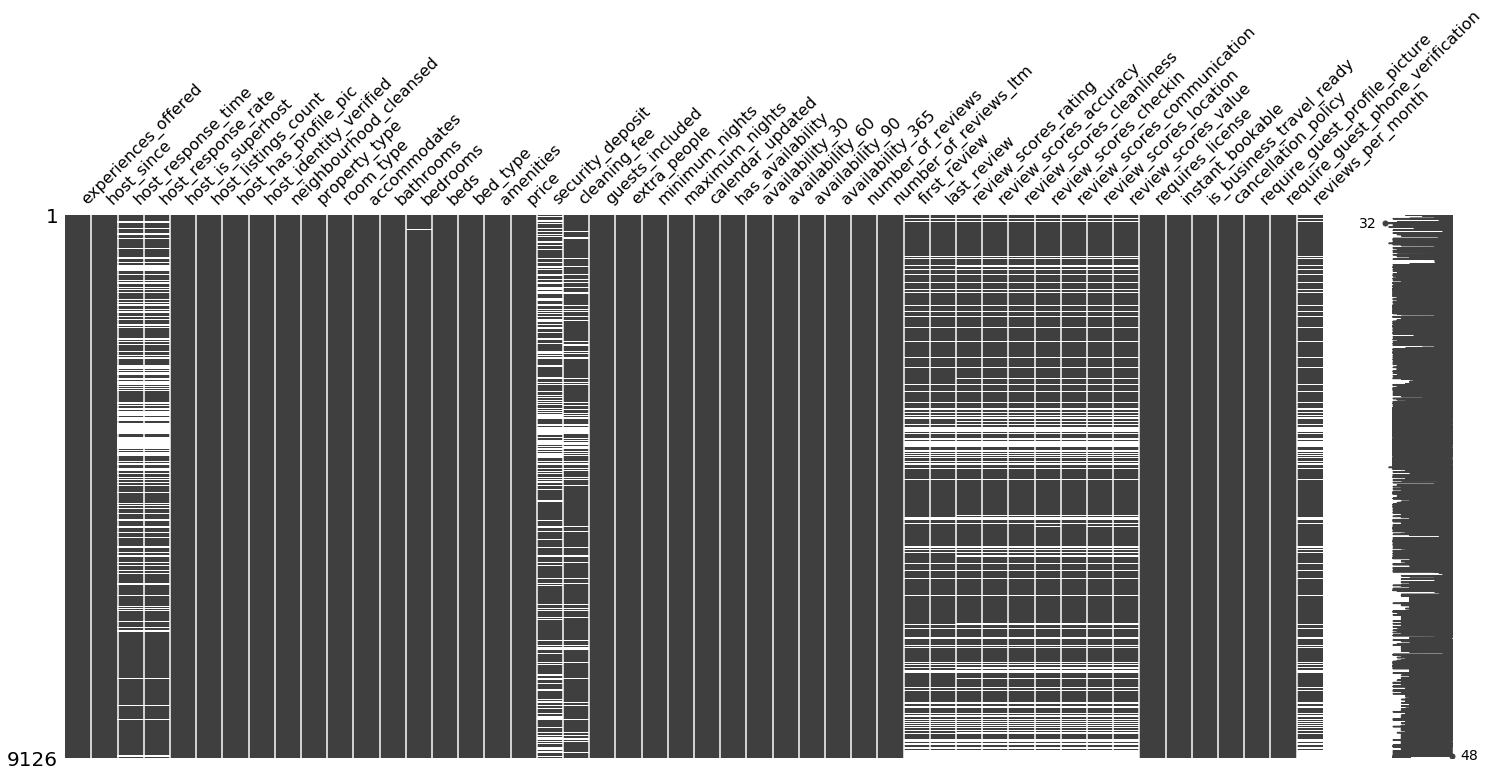

In [10]:
missingno.matrix(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E143CD79B0>,
      dtype=object)

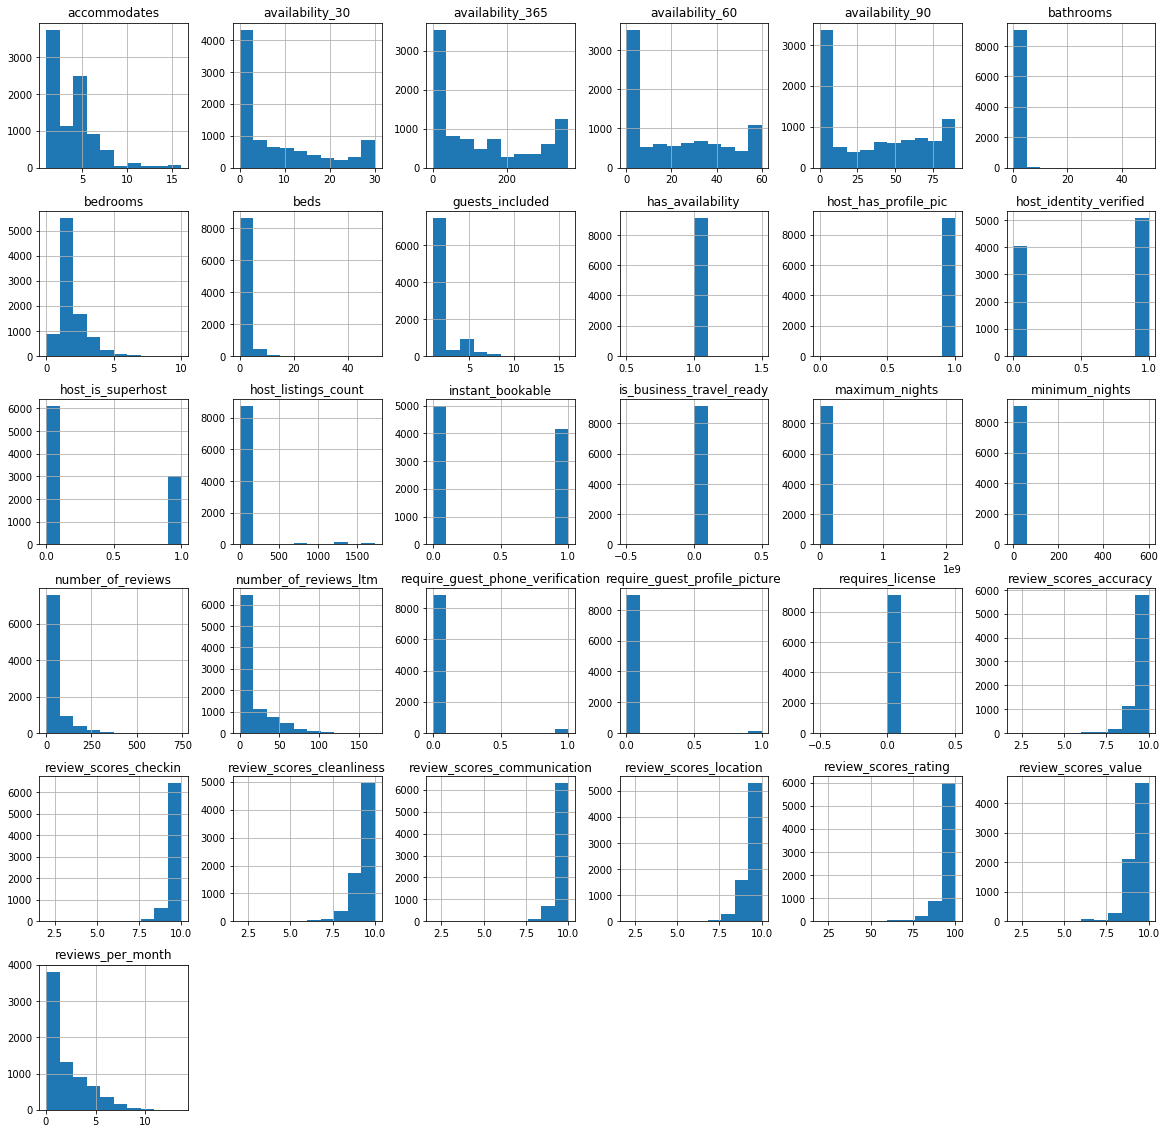

In [11]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)
# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20))

In [12]:
# From the above, it can be seen that several columns only contain one category and can be dropped:
df.drop(['has_availability', 'host_has_profile_pic', 'is_business_travel_ready', 'require_guest_phone_verification', 'require_guest_profile_picture','maximum_nights','minimum_nights','availability_365','availability_60','availability_30', 'requires_license'], axis=1, inplace=True)

### 3.3 Cleaning individual columns

In [13]:
df.head(3)

,experiences_offered,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,availability_90,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
0,none,2008-12-10,within a few hours,100%,0.0,2.0,0.0,"Downtown, Chinatown, Penn Quarters, Mount Vern...",Condominium,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$48.00,$110.00,NaN,1,$25.00,3 months ago,88,11,0,2009-05-09,2016-08-31,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,0.09
1,none,2008-09-07,within an hour,100%,0.0,5.0,1.0,"Shaw, Logan Circle",Townhouse,Entire home/apt,16,3.5,4.0,6.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$433.00,$500.00,$202.00,8,$24.00,4 days ago,59,165,22,2009-01-21,2019-06-30,95.0,9.0,9.0,10.0,10.0,10.0,9.0,1,strict_14_with_grace_period,1.29
2,none,2008-11-26,within a day,100%,0.0,3.0,1.0,Historic Anacostia,House,Private room,1,1.0,1.0,1.0,Pull-out Sofa,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",$65.00,$0.00,$0.00,1,$0.00,4 months ago,47,36,1,2011-04-13,2019-04-14,94.0,10.0,9.0,10.0,10.0,8.0,9.0,0,moderate,0.36


**3.3.1 experiences_offered**

In [14]:
# Most listings offer no experiences so this feature can be dropped.
df.experiences_offered.value_counts()

none    9126
Name: experiences_offered, dtype: int64

In [15]:
df.drop('experiences_offered', axis=1, inplace=True)

In [16]:
df.head(2)

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,availability_90,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
0,2008-12-10,within a few hours,100%,0.0,2.0,0.0,"Downtown, Chinatown, Penn Quarters, Mount Vern...",Condominium,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$48.00,$110.00,NaN,1,$25.00,3 months ago,88,11,0,2009-05-09,2016-08-31,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,0.09
1,2008-09-07,within an hour,100%,0.0,5.0,1.0,"Shaw, Logan Circle",Townhouse,Entire home/apt,16,3.5,4.0,6.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$433.00,$500.00,$202.00,8,$24.00,4 days ago,59,165,22,2009-01-21,2019-06-30,95.0,9.0,9.0,10.0,10.0,10.0,9.0,1,strict_14_with_grace_period,1.29


In [17]:
# rename the neighbourhood_cleansed in order to memorizing
df.rename(columns={'neighbourhood_cleansed': 'borough'}, inplace=True)

In [19]:
# Converting to datetime
df.host_since = pd.to_datetime(df.host_since) 
# Calculating the number of days
df['host_days_active'] = (datetime(2019, 7, 15) - df.host_since).astype('timedelta64[D]')
# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())
# Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 1601.0
Median days as host: 1546.0


**3.3.2 host response time and rate**

In [20]:
print("Null values:", df.host_response_time.isna().sum())
print(f"Proportion: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")

Null values: 2533
Proportion: 27.8%


In [21]:
df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)

within an hour        0.502959
unknown               0.277559
within a few hours    0.149244
within a day          0.057857
a few days or more    0.012382
Name: host_response_time, dtype: float64

In [22]:
print("Null values:", df.host_response_rate.isna().sum())
print(f"Proportion: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")

Null values: 2533
Proportion: 27.8%


In [23]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')
print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 96.0
Median host response rate: 100.0
Proportion of 100% host response rates: 74.6%


In [24]:
# cut into four categories
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)
# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')
# Replace nulls with 'no rate'
df.host_response_rate.replace('nan', 'no rate', inplace=True)
# Category counts
df.host_response_rate.value_counts()

100%       4921
no rate    2533
90-99%      834
50-89%      680
0-49%       158
Name: host_response_rate, dtype: int64

In [25]:
# Number of rows without a value for multiple host-related columns
df.isna().sum()

host_since                        4
host_response_time                0
host_response_rate                0
host_is_superhost                 4
host_listings_count               4
host_identity_verified            4
borough                           0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         9
bedrooms                          4
beds                              8
bed_type                          0
amenities                         0
price                             0
security_deposit               2973
cleaning_fee                   1691
guests_included                   0
extra_people                      0
calendar_updated                  0
availability_90                   0
number_of_reviews                 0
number_of_reviews_ltm             0
first_review                   1828
last_review                    1828
review_scores_rating           1927
review_scores_accuracy      

In [26]:
df.dropna(subset=['host_since'], inplace=True)

In [28]:
df.isna().sum()

host_since                        0
host_response_time                0
host_response_rate                0
host_is_superhost                 0
host_listings_count               0
host_identity_verified            0
borough                           0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         9
bedrooms                          4
beds                              8
bed_type                          0
amenities                         0
price                             0
security_deposit               2970
cleaning_fee                   1689
guests_included                   0
extra_people                      0
calendar_updated                  0
availability_90                   0
number_of_reviews                 0
number_of_reviews_ltm             0
first_review                   1828
last_review                    1828
review_scores_rating           1927
review_scores_accuracy      

**3.3.3 property type and cancellation policy**

In [29]:
df.property_type.value_counts()

Apartment             4116
House                 1910
Townhouse             1435
Condominium            787
Guest suite            492
Serviced apartment      98
Bed and breakfast       63
Loft                    58
Guesthouse              45
Other                   44
Hostel                  25
Bungalow                17
Villa                    7
Boutique hotel           5
Aparthotel               4
Cottage                  3
Boat                     3
Hotel                    2
Dome house               2
Resort                   2
Barn                     2
Tiny house               2
Name: property_type, dtype: int64

In [30]:
# Replacing categories that are types of houses or apartments
df.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

In [32]:
df.cancellation_policy.value_counts()

moderate                       3086
strict_14_with_grace_period    2972
flexible                       2893
strict                          115
super_strict_60                  52
super_strict_30                   4
Name: cancellation_policy, dtype: int64

In [33]:
# Replacing categories
df.cancellation_policy.replace({
    'super_strict_30': 'strict_14_with_grace_period',
    'super_strict_60': 'strict_14_with_grace_period',
    'strict': 'strict_14_with_grace_period',
    'luxury_moderate': 'moderate'
    }, inplace=True)

**3.3.4 bathrooms, bedrooms and beds**

In [34]:
# Missing values will be replaced with the median .
for col in [ 'bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

In [36]:
# Most listings have the same bed type so this feature can be dropped.
df.bed_type.value_counts()

Real Bed         8989
Pull-out Sofa      62
Airbed             31
Futon              30
Couch              10
Name: bed_type, dtype: int64

In [37]:
df.drop('bed_type', axis=1, inplace=True)

**3.3.4 splilit amenities**

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9122 entries, 0 to 9125
Data columns (total 36 columns):
host_since                     9122 non-null datetime64[ns]
host_response_time             9122 non-null object
host_response_rate             9122 non-null object
host_is_superhost              9122 non-null float64
host_listings_count            9122 non-null float64
host_identity_verified         9122 non-null float64
borough                        9122 non-null object
property_type                  9122 non-null object
room_type                      9122 non-null object
accommodates                   9122 non-null int64
bathrooms                      9113 non-null float64
bedrooms                       9122 non-null float64
beds                           9122 non-null float64
amenities                      9122 non-null object
price                          9122 non-null object
security_deposit               6152 non-null object
cleaning_fee                   7433 non-null obj

In [39]:
df.amenities

0       {TV,"Cable TV",Internet,Wifi,"Air conditioning...
1       {TV,Internet,Wifi,"Air conditioning",Kitchen,"...
2       {TV,Internet,Wifi,Kitchen,"Free parking on pre...
3       {Wifi,"Air conditioning","Pets live on this pr...
4       {Internet,Wifi,Kitchen,"Free street parking","...
5       {"Cable TV","Air conditioning",Heating,"Smoke ...
6       {TV,Wifi,"Air conditioning",Kitchen,"Pets live...
7       {TV,"Cable TV",Internet,Wifi,"Air conditioning...
8       {Internet,Wifi,"Air conditioning",Kitchen,"Fre...
9       {"Cable TV",Internet,Wifi,"Air conditioning",K...
10      {TV,Internet,Wifi,"Air conditioning",Kitchen,"...
11      {TV,Internet,Wifi,"Air conditioning",Kitchen,"...
12      {TV,"Cable TV",Internet,Wifi,"Air conditioning...
13      {TV,"Cable TV",Internet,Wifi,"Air conditioning...
14      {TV,"Cable TV",Internet,Wifi,"Air conditioning...
15      {TV,"Cable TV",Internet,Wifi,"Air conditioning...
16      {TV,"Cable TV",Internet,Wifi,"Air conditioning...
17      {Inter

In [40]:
df.amenities[:1].values

array(['{TV,"Cable TV",Internet,Wifi,"Air conditioning",Kitchen,Doorman,Gym,Breakfast,Elevator,"Buzzer/wireless intercom",Heating,"Suitable for events",Washer,Dryer,"Smoke detector","First aid kit","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door","24-hour check-in",Hangers,Iron,"Laptop friendly workspace","Hot water","Long term stays allowed","Host greets you","Paid parking on premises"}'],
      dtype=object)

In [42]:
# Creating a set of all possible amenities
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Amazon Echo',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Balcony',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Bidet',
 'Body soap',
 'Breakfast',
 'Breakfast table',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling fan',
 'Central air conditioning',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Convection oven',
 'Cooking basics',
 'Crib',
 'DVD player',
 'Day bed',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Double oven',
 'Dryer',
 'EV charger',
 'Electric profiling bed',
 'Elevator',
 'En suite bathroom',
 'Espresso machine',
 'Essentials',
 'Ethernet con

In [43]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

C:\Users\77350\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9122 entries, 0 to 9125
Data columns (total 64 columns):
host_since                     9122 non-null datetime64[ns]
host_response_time             9122 non-null object
host_response_rate             9122 non-null object
host_is_superhost              9122 non-null float64
host_listings_count            9122 non-null float64
host_identity_verified         9122 non-null float64
borough                        9122 non-null object
property_type                  9122 non-null object
room_type                      9122 non-null object
accommodates                   9122 non-null int64
bathrooms                      9113 non-null float64
bedrooms                       9122 non-null float64
beds                           9122 non-null float64
amenities                      9122 non-null object
price                          9122 non-null object
security_deposit               6152 non-null object
cleaning_fee                   7433 non-null obj

In [45]:
df.iloc[:,36:].columns

Index(['check_in_24h', 'air_conditioning', 'high_end_electronics', 'bbq',
       'balcony', 'nature_and_views', 'bed_linen', 'breakfast', 'tv',
       'coffee_machine', 'cooking_basics', 'white_goods', 'elevator', 'gym',
       'child_friendly', 'parking', 'outdoor_space', 'host_greeting',
       'hot_tub_sauna_or_pool', 'internet', 'long_term_stays', 'pets_allowed',
       'private_entrance', 'secure', 'self_check_in', 'smoking_allowed',
       'accessible', 'event_suitable'],
      dtype='object')

In [46]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,36:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)
df.drop('amenities', axis=1, inplace=True)
#drop amenities features with few values
df.drop(['high_end_electronics','nature_and_views','host_greeting','hot_tub_sauna_or_pool','smoking_allowed','accessible','event_suitable'], axis=1, inplace=True)

**3.3.5 missing value**

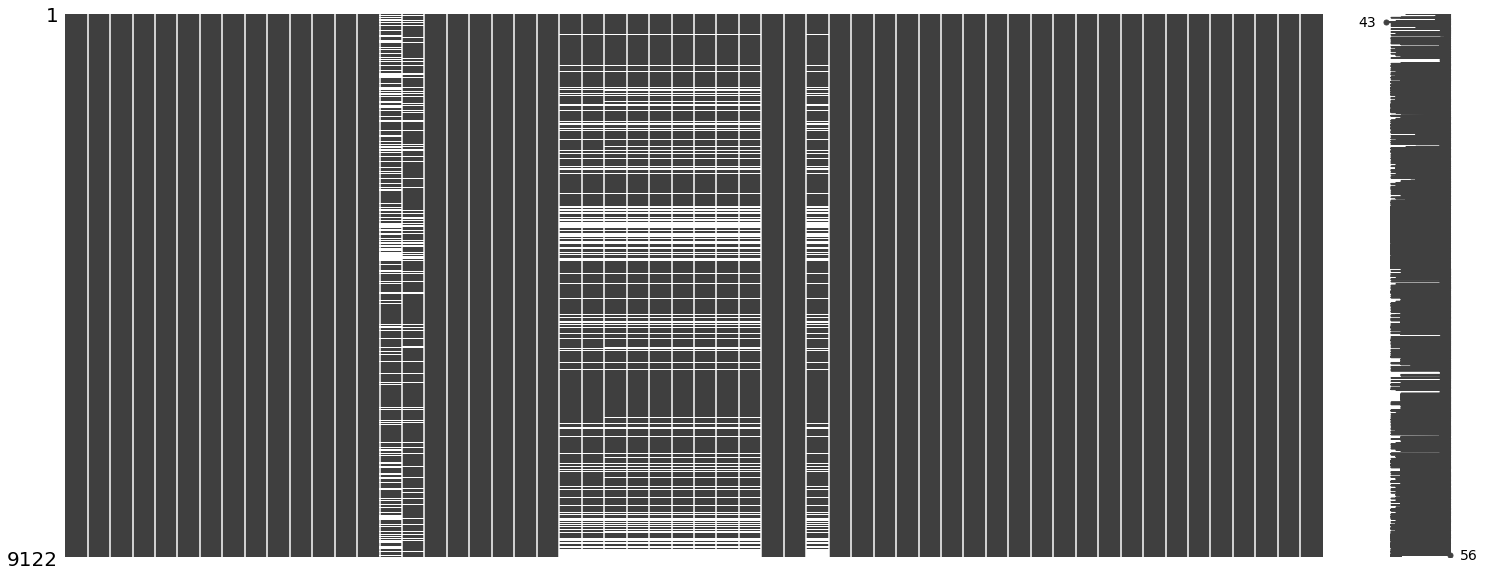

In [47]:
missingno.matrix(df)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9122 entries, 0 to 9125
Data columns (total 56 columns):
host_since                     9122 non-null datetime64[ns]
host_response_time             9122 non-null object
host_response_rate             9122 non-null object
host_is_superhost              9122 non-null float64
host_listings_count            9122 non-null float64
host_identity_verified         9122 non-null float64
borough                        9122 non-null object
property_type                  9122 non-null object
room_type                      9122 non-null object
accommodates                   9122 non-null int64
bathrooms                      9113 non-null float64
bedrooms                       9122 non-null float64
beds                           9122 non-null float64
price                          9122 non-null object
security_deposit               6152 non-null object
cleaning_fee                   7433 non-null object
guests_included                9122 non-null int

In [49]:
# Price will be converted to an integer .
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

In [50]:
df.security_deposit.isna().sum()

2970

In [51]:
df.security_deposit = df.security_deposit.str[1:-3]
df.security_deposit = df.security_deposit.str.replace(",", "")
df.security_deposit.fillna(0, inplace=True)
df.security_deposit = df.security_deposit.astype('int64')

In [52]:
df.cleaning_fee.isna().sum()

1689

In [53]:
df.cleaning_fee = df.cleaning_fee.str[1:-3]
df.cleaning_fee = df.cleaning_fee.str.replace(",", "")
df.cleaning_fee.fillna(0, inplace=True)
df.cleaning_fee = df.cleaning_fee.astype('int64')

In [54]:
df.extra_people = df.extra_people.str[1:-3]
df.extra_people = df.extra_people.str.replace(",", "")
df.extra_people.fillna(0, inplace=True)
df.extra_people = df.extra_people.astype('int64')

In [55]:
print("Number of categories:", df.calendar_updated.nunique())
print("\nTop five categories:")
df.calendar_updated.value_counts()[:5]

Number of categories: 73

Top five categories:


today           1923
2 weeks ago      541
2 months ago     516
a week ago       484
3 weeks ago      399
Name: calendar_updated, dtype: int64

In [56]:
df.drop(['calendar_updated'], axis=1, inplace=True)

**3.3.6 reviews column**

In [57]:
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

Null values in 'first_review': 20.0%
Null values in 'review_scores_rating': 21.1%


In [58]:
# Converting to datetime
df.first_review = pd.to_datetime(df.first_review) 
# Calculating the number of days between the first review and the date the data was scraped
df['time_since_first_review'] = (datetime(2019, 7, 15) - df.first_review).astype('timedelta64[D]')

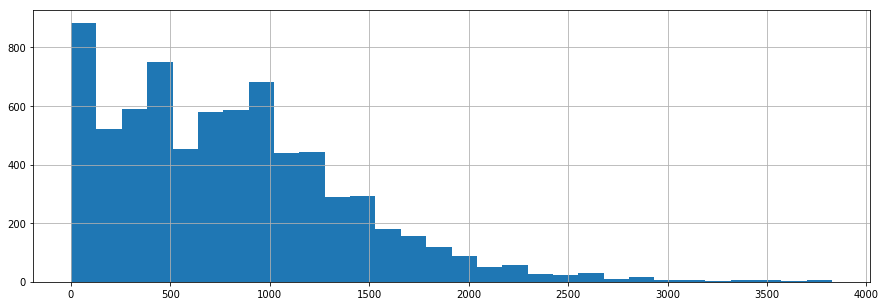

In [59]:
# Distribution of the number of days since first review
df.time_since_first_review.hist(figsize=(15,5), bins=30);

In [60]:
def bin_column(col, bins, labels, na_label='unknown'):
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [61]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(df.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

In [62]:
# Converting to datetime,The same process will be followed for last_review:
df.last_review = pd.to_datetime(df.last_review) 
# Calculating the number of days between the most recent review and the date the data was scraped
df['time_since_last_review'] = (datetime(2019, 7, 15) - df.last_review).astype('timedelta64[D]')

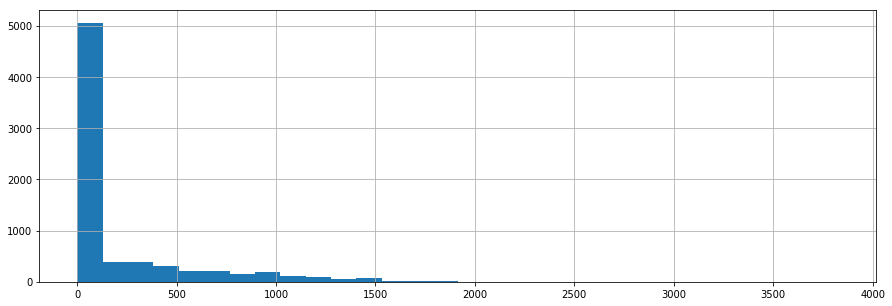

In [63]:
# Distribution of the number of days since last review
df.time_since_last_review.hist(figsize=(15,5), bins=30);

In [64]:
# Dropping last_review - first_review will be kept for EDA and dropped later
df.drop('last_review', axis=1, inplace=True)

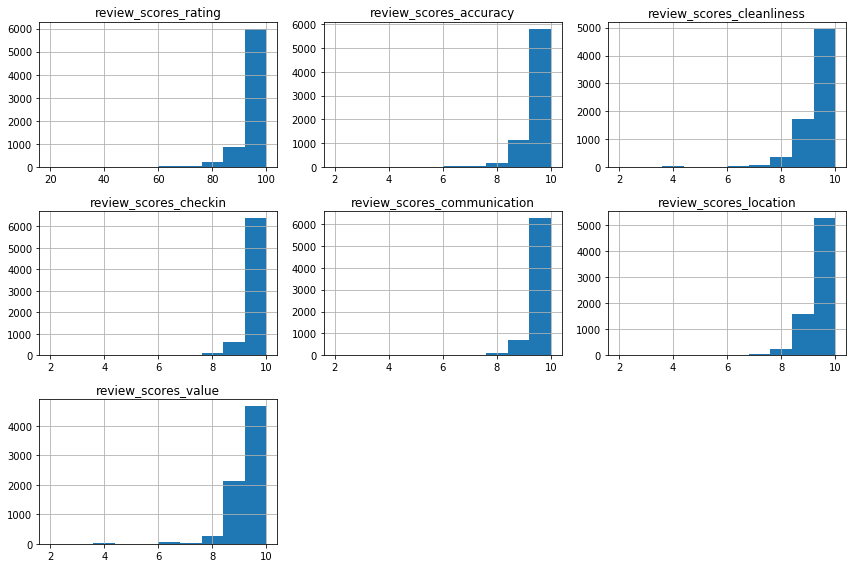

In [65]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [66]:
# Creating a list of all review columns that are scored out of 10
variables_to_plot.pop(0)
# Binning for all columns scored out of 10
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')

In [67]:
# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

In [68]:
df.drop(['reviews_per_month','first_review','host_since'],axis=1, inplace=True)

# 4 Exploratory data analysis

### 4.1 Numerical features

In [69]:
df.describe()

,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,availability_90,number_of_reviews,number_of_reviews_ltm,instant_bookable,host_days_active,check_in_24h,air_conditioning,bbq,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,time_since_last_review
count,9122.000000,9122.000000,9122.000000,9122.000000,9113.000000,9122.000000,9122.00000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,9122.000000,7294.000000
mean,0.332274,56.677812,0.556128,3.714098,1.358609,1.387086,1.94727,203.036176,147.828546,60.922166,1.845977,12.845977,35.525323,37.551414,14.627604,0.455492,1600.690638,0.168932,0.958123,0.099868,0.172440,0.379522,0.114558,0.835562,0.384346,0.348937,0.859132,0.180991,0.131112,0.450340,0.614777,0.155448,0.978294,0.305196,0.206424,0.393006,0.145363,0.478952,214.551823
std,0.471054,254.403748,0.496867,2.362508,0.852749,0.983261,1.54612,333.712767,340.347868,63.477451,1.539403,23.277589,32.897956,61.721651,22.210611,0.498042,762.602039,0.374713,0.200319,0.299841,0.377783,0.485295,0.318505,0.370693,0.486467,0.476660,0.347905,0.385032,0.337541,0.497555,0.486675,0.362351,0.145729,0.460516,0.404761,0.488445,0.352486,0.499584,358.224862
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,10.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,79.250000,0.000000,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1069.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
50%,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.00000,119.000000,0.000000,50.000000,1.000000,0.000000,33.000000,11.000000,3.000000,0.000000,1546.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000
75%,1.000000,4.000000,1.000000,5.000000,1.500000,2.000000,2.00000,198.750000,200.000000,90.000000,2.000000,20.000000,65.000000,47.000000,21.000000,1.000000,2121.750000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,260.000000
max,1.000000,1725.000000,1.000000,16.000000,50.000000,10.000000,50.00000,10000.000000,5000.000000,550.000000,16.000000,300.000000,90.000000,745.000000,170.000000,1.000000,3993.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3827.000000


In [70]:
print(f"Nightly prices range from £{min(df.price)} to £{max(df.price)}.")

Nightly prices range from £10 to £10000.


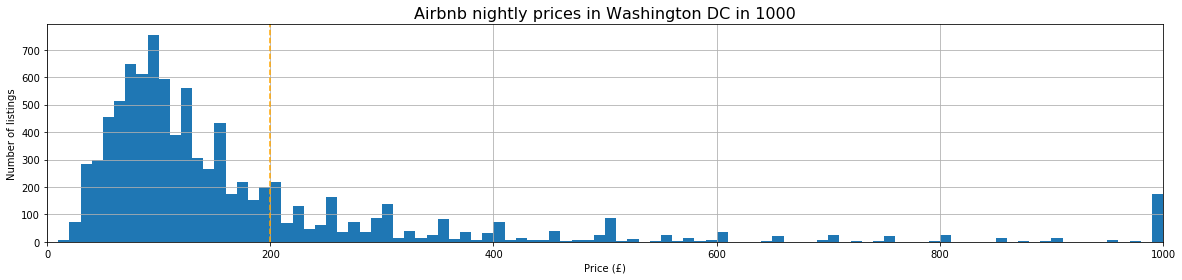

In [71]:
# Distribution of prices from £0 to £1000
plt.figure(figsize=(20,4))
df.price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(200, color='orange', linestyle='--')
plt.title("Airbnb nightly prices in Washington DC in 1000", fontsize=16)
plt.xlabel("Price (£)")
plt.ylabel("Number of listings")
plt.show()

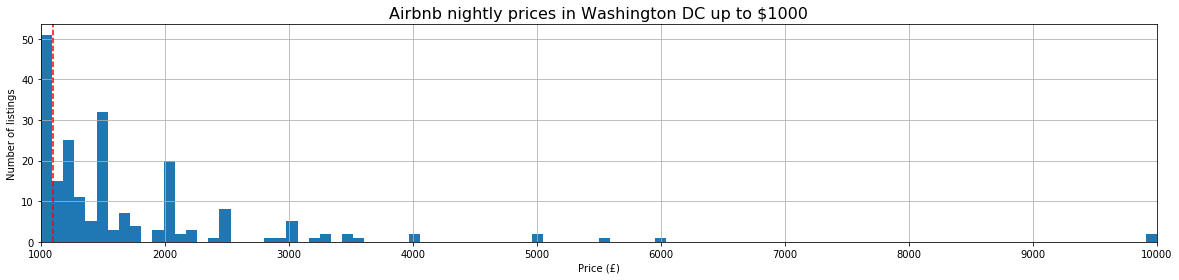

In [73]:
# Distribution of prices from £200 upwards
plt.figure(figsize=(20,4))
df.price.hist(bins=100, range=(1000, max(df.price)))
plt.margins(x=0)
plt.axvline(1100, color='red', linestyle='--')
plt.title("Airbnb nightly prices in Washington DC up to $1000", fontsize=16)
plt.xlabel("Price (£)")
plt.ylabel("Number of listings")
plt.show()

In [74]:
# Replacing values under £10 with £10
df.loc[df.price <= 10, 'price'] = 10
# Replacing values over £1000 with £1000
df.loc[df.price >= 1000, 'price'] = 1000

### 4.2 Categorical features

In [75]:
def category_count_plot(col, figsize=(8,4)):
    plt.figure(figsize=figsize)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

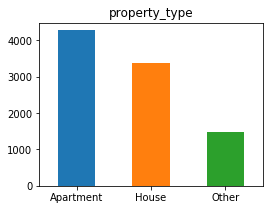

Apartment    0.468318
House        0.369875
Other        0.161807
Name: property_type, dtype: float64


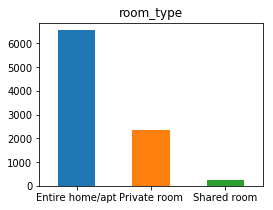

Entire home/apt    0.717606
Private room       0.257838
Shared room        0.024556
Name: room_type, dtype: float64


In [76]:
for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(4,3))
    print(df[col].value_counts(normalize=True))

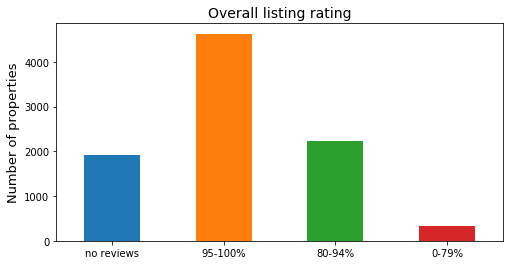

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.set_title('Overall listing rating', fontsize=14)
df['review_scores_rating'].value_counts().sort_index(ascending=False).plot(kind='bar', ax=ax)
ax.set_xticklabels(labels=['no reviews', '95-100%', '80-94%', '0-79%'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Number of properties', fontsize=13)
plt.show()

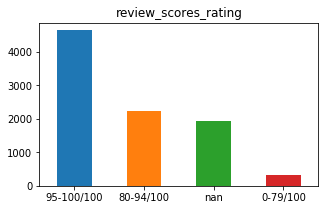

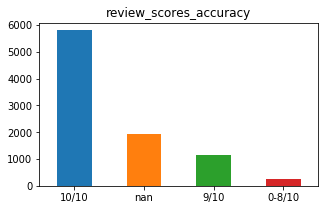

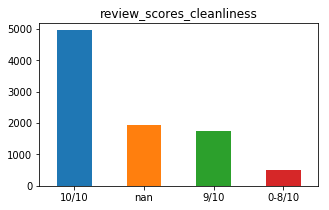

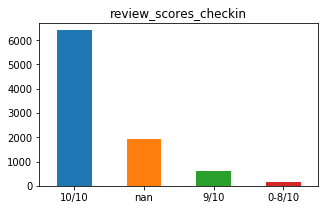

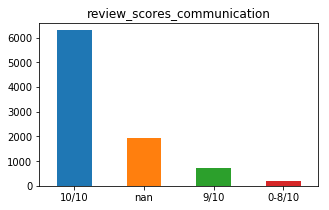

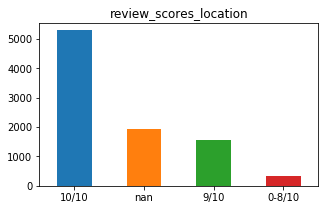

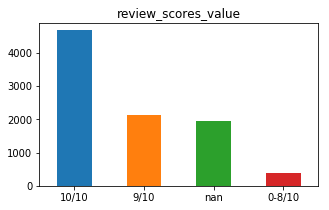

In [78]:
for col in list(df.columns[df.columns.str.startswith("review_scores") == True]):
    category_count_plot(col, figsize=(5,3))

### 4.3 check data and correlations

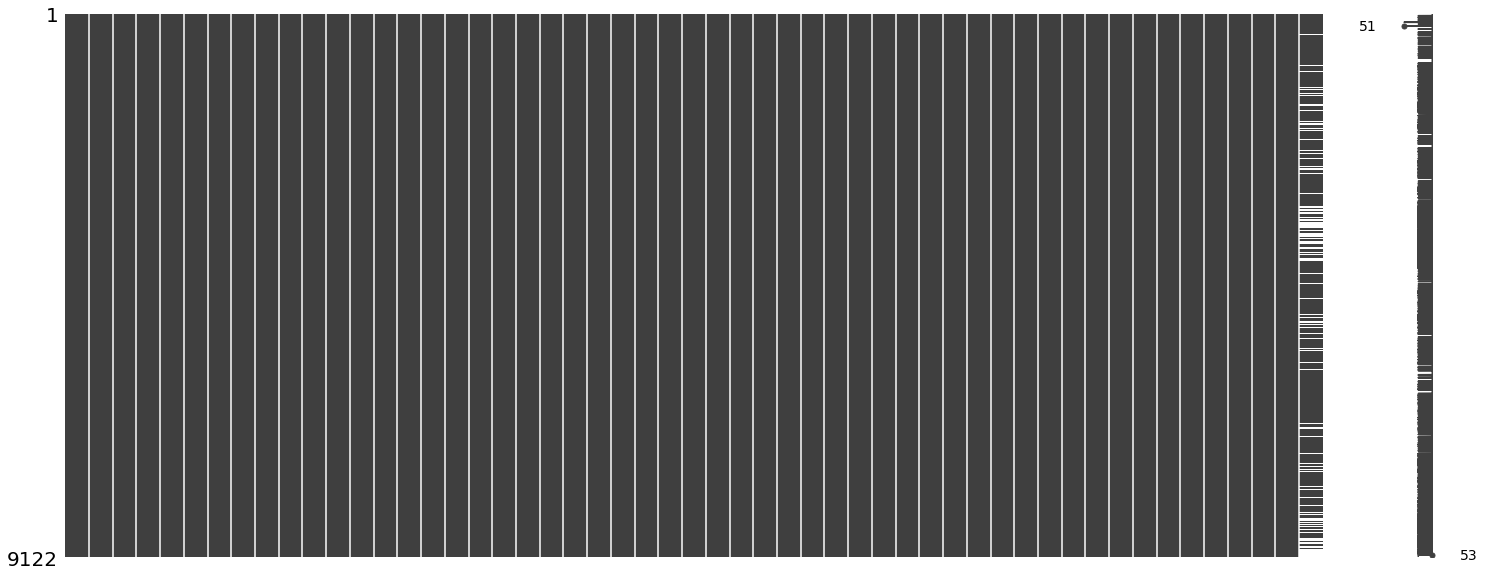

In [79]:
missingno.matrix(df)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9122 entries, 0 to 9125
Data columns (total 53 columns):
host_response_time             9122 non-null object
host_response_rate             9122 non-null object
host_is_superhost              9122 non-null float64
host_listings_count            9122 non-null float64
host_identity_verified         9122 non-null float64
borough                        9122 non-null object
property_type                  9122 non-null object
room_type                      9122 non-null object
accommodates                   9122 non-null int64
bathrooms                      9113 non-null float64
bedrooms                       9122 non-null float64
beds                           9122 non-null float64
price                          9122 non-null int64
security_deposit               9122 non-null int64
cleaning_fee                   9122 non-null int64
guests_included                9122 non-null int64
extra_people                   9122 non-null int64
availabil

In [81]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

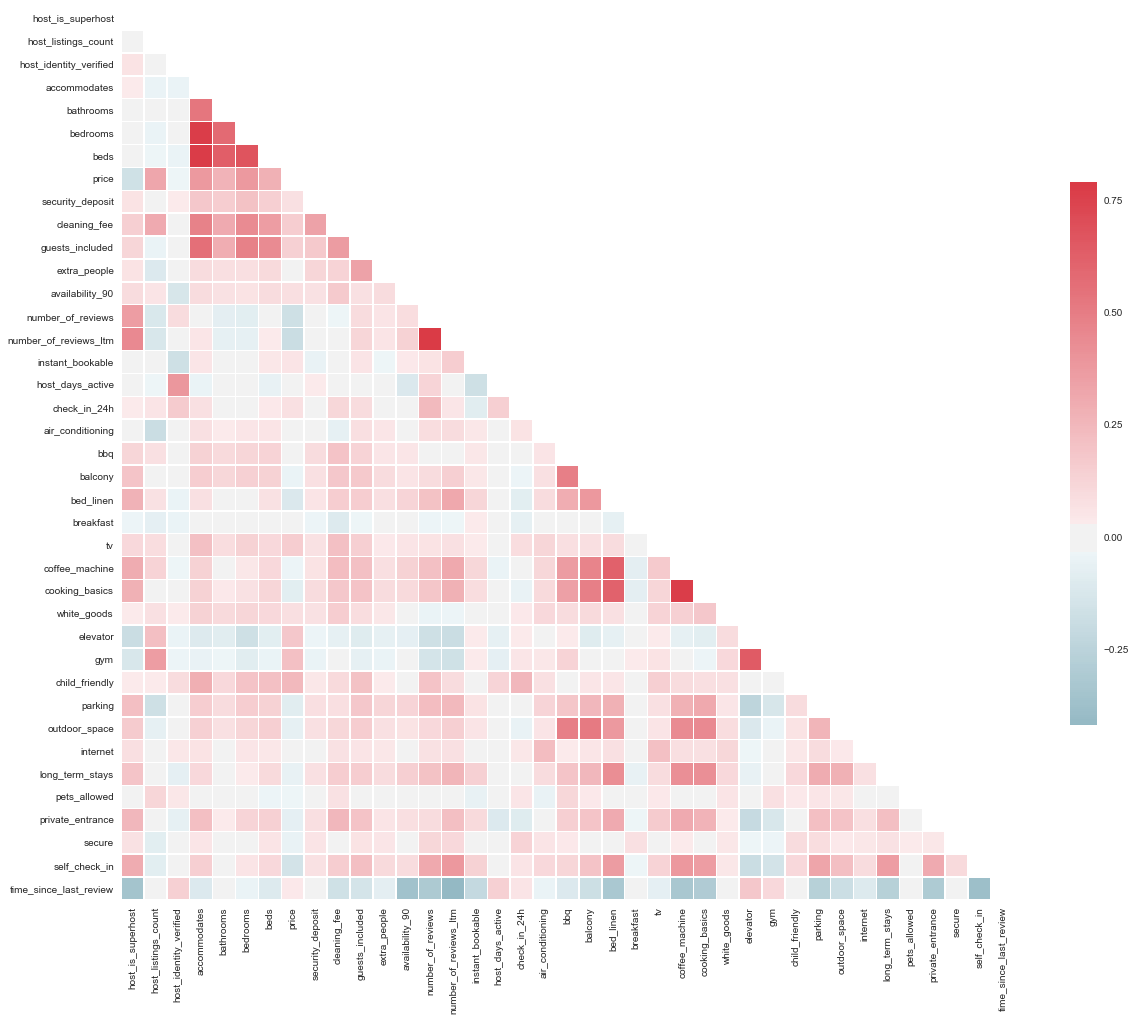

In [82]:
multi_collinearity_heatmap(df, figsize=(20,20))

In [83]:
# Dropping collinear and not important features
df.drop(['host_response_time','host_response_rate','host_listings_count','beds','security_deposit','cleaning_fee','guests_included','number_of_reviews_ltm','cooking_basics','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','host_days_active','time_since_last_review','time_since_first_review','self_check_in','outdoor_space','bbq','long_term_stays','child_friendly','bed_linen','white_goods','breakfast'],axis=1,inplace=True)


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9122 entries, 0 to 9125
Data columns (total 26 columns):
host_is_superhost         9122 non-null float64
host_identity_verified    9122 non-null float64
borough                   9122 non-null object
property_type             9122 non-null object
room_type                 9122 non-null object
accommodates              9122 non-null int64
bathrooms                 9113 non-null float64
bedrooms                  9122 non-null float64
price                     9122 non-null int64
extra_people              9122 non-null int64
availability_90           9122 non-null int64
number_of_reviews         9122 non-null int64
review_scores_rating      9122 non-null object
cancellation_policy       9122 non-null object
check_in_24h              9122 non-null float64
air_conditioning          9122 non-null float64
balcony                   9122 non-null float64
tv                        9122 non-null float64
coffee_machine            9122 non-null floa

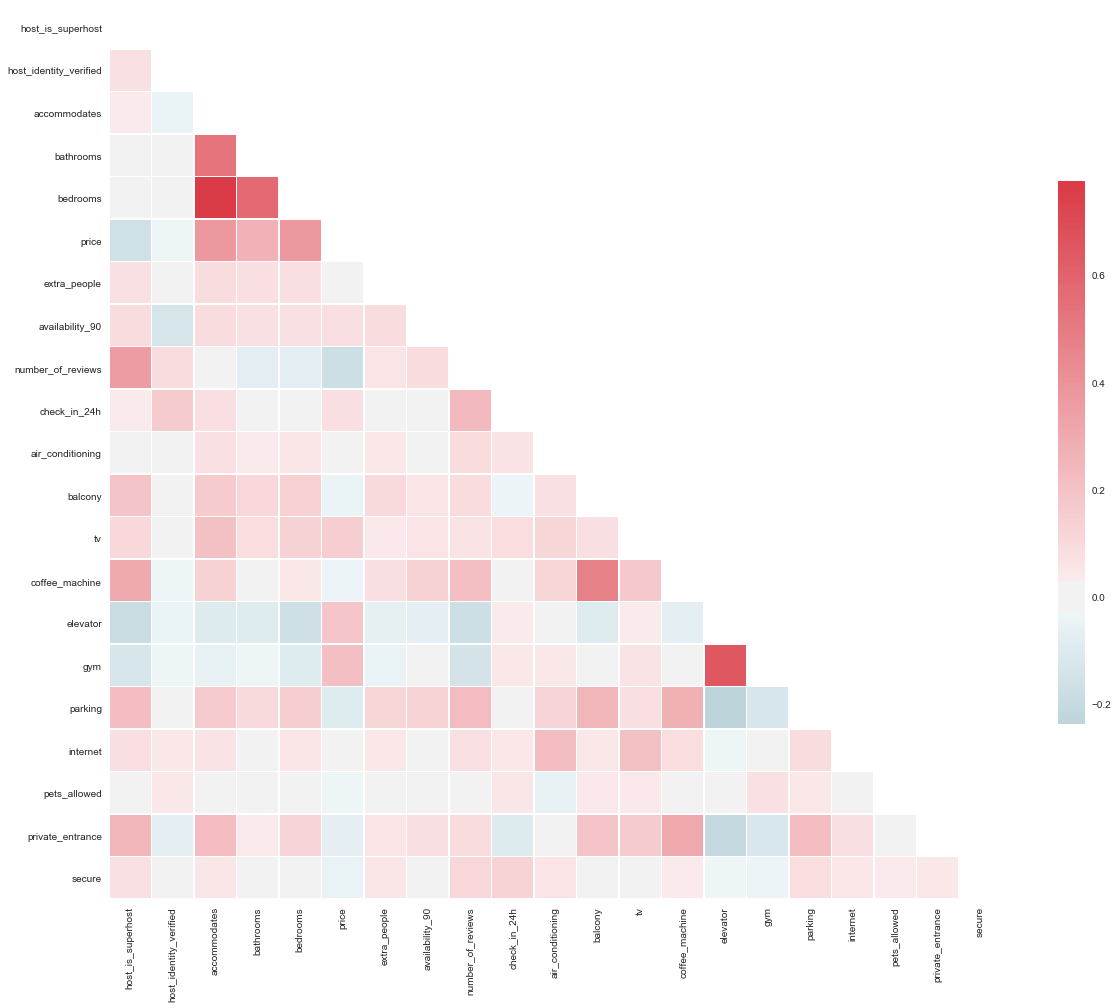

In [85]:
multi_collinearity_heatmap(df, figsize=(20,20))

In [86]:
df.bathrooms.fillna(1, inplace=True)
df.extra_people = df.extra_people.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9122 entries, 0 to 9125
Data columns (total 26 columns):
host_is_superhost         9122 non-null float64
host_identity_verified    9122 non-null float64
borough                   9122 non-null object
property_type             9122 non-null object
room_type                 9122 non-null object
accommodates              9122 non-null int64
bathrooms                 9122 non-null float64
bedrooms                  9122 non-null float64
price                     9122 non-null int64
extra_people              9122 non-null int64
availability_90           9122 non-null int64
number_of_reviews         9122 non-null int64
review_scores_rating      9122 non-null object
cancellation_policy       9122 non-null object
check_in_24h              9122 non-null float64
air_conditioning          9122 non-null float64
balcony                   9122 non-null float64
tv                        9122 non-null float64
coffee_machine            9122 non-null floa

,host_is_superhost,host_identity_verified,borough,property_type,room_type,accommodates,bathrooms,bedrooms,price,extra_people,availability_90,number_of_reviews,review_scores_rating,cancellation_policy,check_in_24h,air_conditioning,balcony,tv,coffee_machine,elevator,gym,parking,internet,pets_allowed,private_entrance,secure
0,0.0,0.0,"Downtown, Chinatown, Penn Quarters, Mount Vern...",Other,Private room,1,1.0,1.0,48,25,88,11,95-100/100,moderate,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,"Shaw, Logan Circle",House,Entire home/apt,16,3.5,4.0,433,24,59,165,80-94/100,strict_14_with_grace_period,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,1.0,Historic Anacostia,House,Private room,1,1.0,1.0,65,0,47,36,80-94/100,moderate,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,0.0,"Howard University, Le Droit Park, Cardozo/Shaw",House,Private room,2,1.0,1.0,75,0,90,79,80-94/100,strict_14_with_grace_period,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,Historic Anacostia,House,Private room,1,1.0,1.0,55,0,21,70,80-94/100,moderate,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


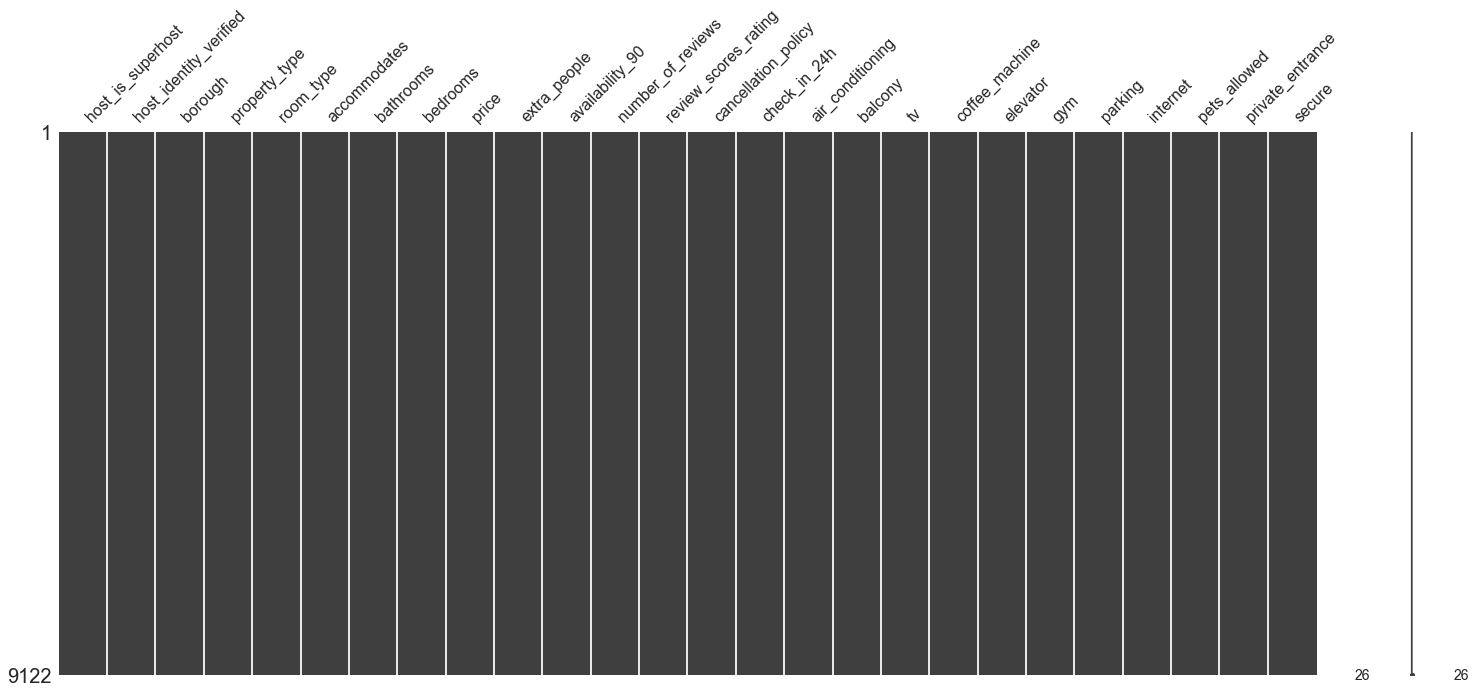

In [87]:
missingno.matrix(df)
df.head(5)

In [88]:
numerical_columns = ['accommodates', 'availability_90', 'extra_people', 'number_of_reviews', 'price']
df_fin = pd.get_dummies(df)

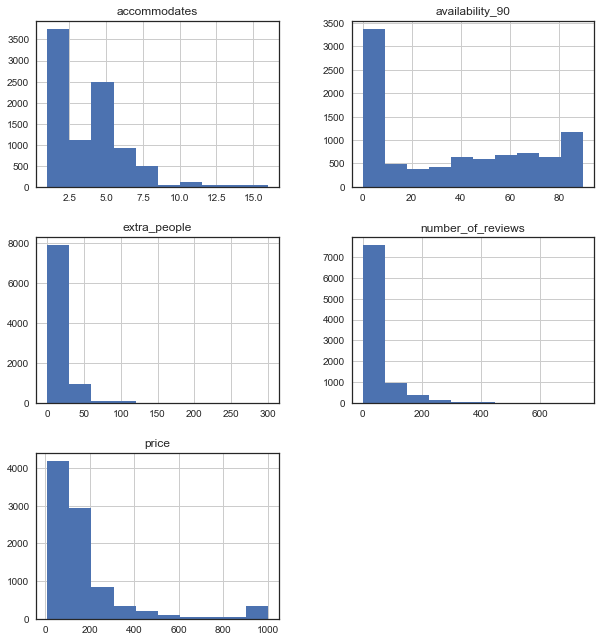

In [89]:
df_fin[numerical_columns].hist(figsize=(10,11));

In [90]:
# Log transforming columns
numerical_columns = [i for i in numerical_columns if i not in ['availability_90', 'host_days_active']] # Removing items not to be transformed

for col in numerical_columns:
    df_fin[col] = df_fin[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    df_fin[col] = np.log(df_fin[col])

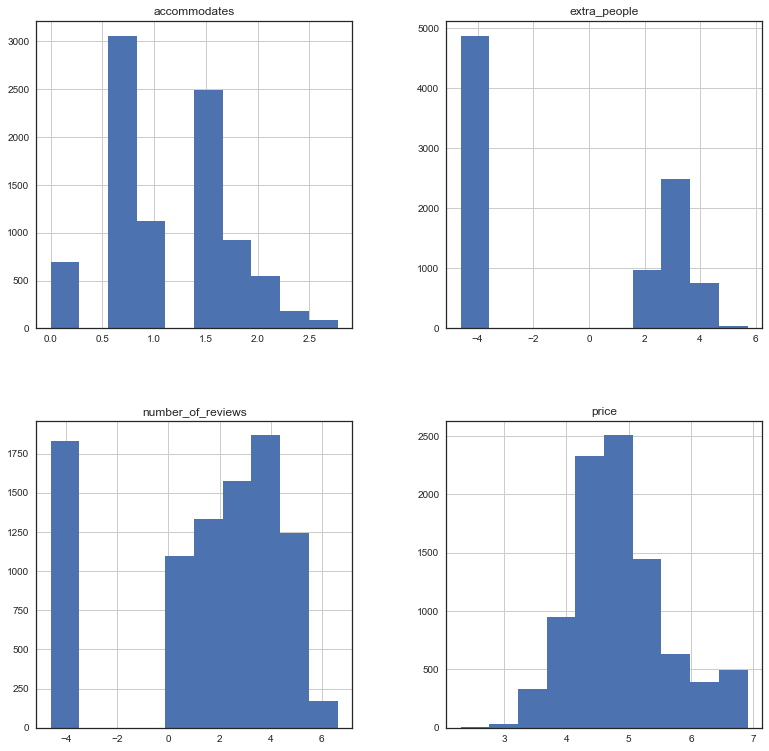

In [91]:
df_fin[numerical_columns].hist(figsize=(13,13));

# 5 Training Model

In [92]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9122 entries, 0 to 9125
Data columns (total 73 columns):
host_is_superhost                                                                                            9122 non-null float64
host_identity_verified                                                                                       9122 non-null float64
accommodates                                                                                                 9122 non-null float64
bathrooms                                                                                                    9122 non-null float64
bedrooms                                                                                                     9122 non-null float64
price                                                                                                        9122 non-null float64
extra_people                                                                                               

### 5.1 Set train and test data

In [93]:
X = df_fin.drop('price', axis=1)
y = df_fin.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### 5.2 Linear Regression

In [94]:
ols_regressor = LinearRegression()
ols_regressor.fit(X_train, y_train)

# displaying coefficients of each feature
y_predict = ols_regressor.predict(X_test)
score = ols_regressor.score(X_train, y_train)
score
print("\nTraining r2:", round(r2_score(y_train,ols_regressor.predict(X_train)),4))
print("Validation r2:", round(r2_score(y_test, ols_regressor.predict(X_test)),4))



Training r2: 0.6051
Validation r2: 0.5789


In [95]:
# 1 feature only linear model
X1 = df_fin.accommodates
# print(X1.shape, type(X1), y1.shape, type(y1))
y1 = df_fin.price
X1 = np.array(X1).reshape(-1,1)
y1 = np.array(y1).reshape(-1,1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1)

# multiple linear regression
ols_regressor = LinearRegression()
ols_regressor.fit(X1_train, y1_train)

# displaying coefficients of each feature
y1_predict = ols_regressor.predict(X1_test)
score1 = ols_regressor.score(X1_test, y1_test)
score1


0.2620643324123797

### 5.3 DecisionTree

In [96]:

dtsin = DecisionTreeRegressor(max_depth=5)
dtsin.fit(X_train, y_train)
print("\nTraining r2:", round(r2_score(y_train,dtsin.predict(X_train)),4))
print("Validation r2:", round(r2_score(y_test, dtsin.predict(X_test)),4))


Training r2: 0.5694
Validation r2: 0.5305


### 5.4 Random Forest

In [97]:
forest = RandomForestRegressor(n_estimators=500,max_depth=6)
forest.fit(X_train, y_train)
print("\nTraining r2:", round(r2_score(y_train,forest.predict(X_train)),4))
print("Validation r2:", round(r2_score(y_test, forest.predict(X_test)),4))


Training r2: 0.647
Validation r2: 0.5978


### 5.5 Xgboost

In [98]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)
xgb_reg_end = time.time()
# print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
# print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))


Training r2: 0.6668
Validation r2: 0.6368


In [99]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
"borough_Douglas, Shipley Terrace",0.000000
"borough_Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace",0.000000
"borough_Cathedral Heights, McLean Gardens, Glover Park",0.000000
"borough_Eastland Gardens, Kenilworth",0.000000
"borough_Edgewood, Bloomingdale, Truxton Circle, Eckington",0.000000
"borough_Friendship Heights, American University Park, Tenleytown",0.000000
"borough_Hawthorne, Barnaby Woods, Chevy Chase",0.000000
"borough_Kalorama Heights, Adams Morgan, Lanier Heights",0.000000
"borough_Near Southeast, Navy Yard",0.000000
"borough_Colonial Village, Shepherd Park, North Portal Estates",0.000000


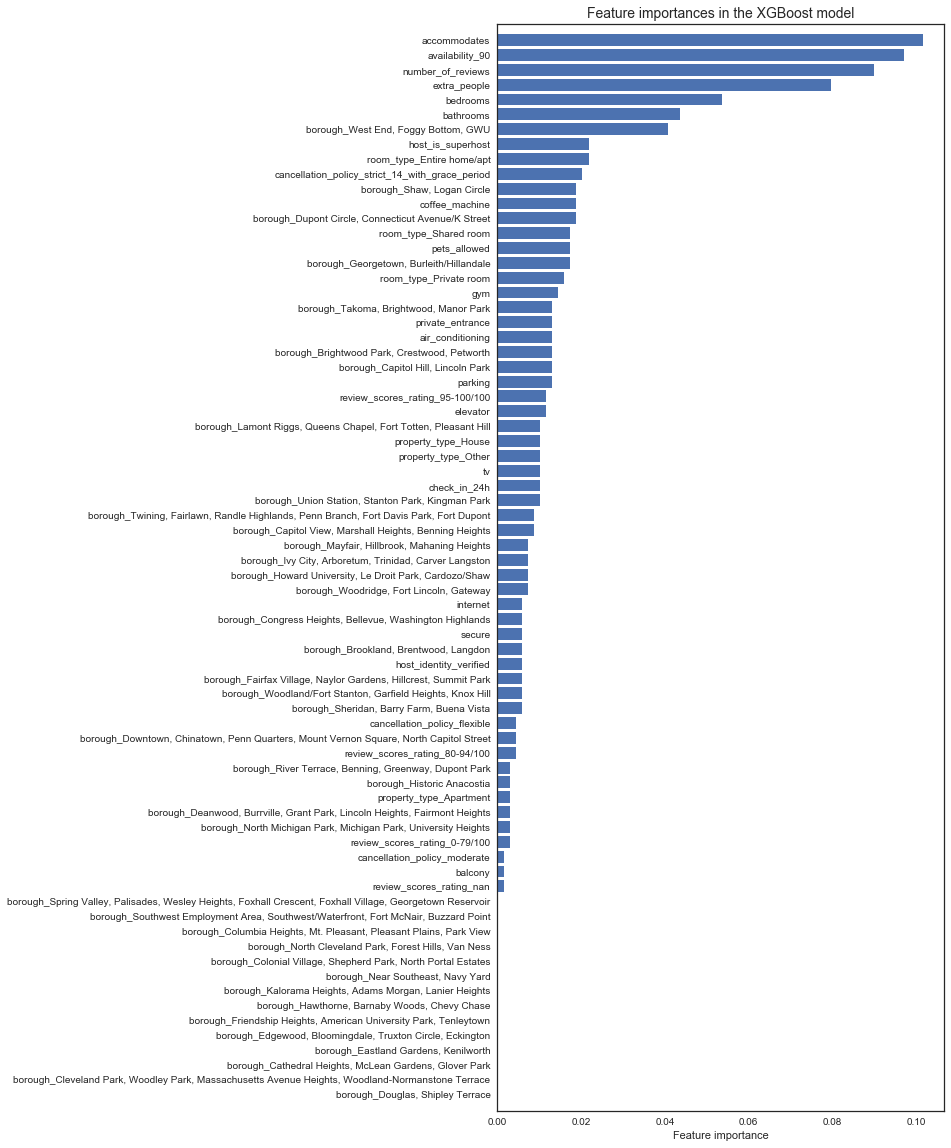

In [100]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [101]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9122 entries, 0 to 9125
Data columns (total 73 columns):
host_is_superhost                                                                                            9122 non-null float64
host_identity_verified                                                                                       9122 non-null float64
accommodates                                                                                                 9122 non-null float64
bathrooms                                                                                                    9122 non-null float64
bedrooms                                                                                                     9122 non-null float64
price                                                                                                        9122 non-null float64
extra_people                                                                                               

### 5.6 Neural Network

In [102]:
input_dim = len(df_fin.columns)-1 # input dimension: just x

model = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model.add(layers.Dense(80, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='relu')) 
# layer 1
model.add(layers.Dense(30, kernel_initializer='normal', 
                activation='relu')) 
# model.add(layers.Dense(20, kernel_initializer='normal', 
#                 activation='relu')) 
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

# configure the model
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                5840      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 8,301
Trainable params: 8,301
Non-trainable params: 0
_________________________________________________________________
None


In [105]:
# df.to_csv("135.csv")
# len(df_fin.columns) # input dimension: just x
# X_train.shape

In [106]:
history=model.fit(X_train, y_train, batch_size=100, epochs=20, validation_data=(X_test, y_test), verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 7297 samples, validate on 1825 samples
Epoch 1/20
7297/7297 [==============================] - 0s 36us/step - loss: 7.7720 - val_loss: 0.6614
Epoch 2/20
7297/7297 [==============================] - 0s 12us/step - loss: 0.5110 - val_loss: 0.3559
Epoch 3/20
7297/7297 [==============================] - 0s 12us/step - loss: 0.3561 - val_loss: 0.2894
Epoch 4/20
7297/7297 [==============================] - 0s 12us/step - loss: 0.2995 - val_loss: 0.2601
Epoch 5/20
7297/7297 [==============================] - 0s 11us/step - loss: 0.2690 - val_loss: 0.2460
Epoch 6/20
7297/7297 [==============================] - 0s 12us/step - loss: 0.2537 - val_loss: 0.2380
Epoch 7/20
7297/7297 [==============================] - 0s 11us/step - loss: 0.2434 - val_loss: 0.2316
Epoch 8/20
7297/7297 [==============================] - 0s 11us/step - loss: 0.2391 - val_loss: 0.2296
Epoch 9/20
7297/7297 [==============================] - 0s 12us/step - loss: 0.2

20


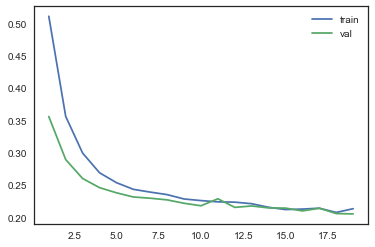

In [107]:
print(len(history.history['loss']))
epochs = np.arange(len(history.history['val_loss']))
plt.plot(epochs[1:], (history.history['loss'][1:]), label='train')
plt.plot(epochs[1:], (history.history['val_loss'][1:]), label='val')
plt.legend()

In [108]:
np.where(history.history['val_loss']==np.min(history.history['val_loss']))

(array([19], dtype=int64),)

In [109]:
print("\nTraining r2:", round(r2_score(y_train, model.predict(X_train)),4))
print("Test r2:", round(r2_score(y_test, model.predict(X_test)),4))


Training r2: 0.6742
Test r2: 0.6342


In [103]:
input_dim = len(df_fin.columns)-1 # input dimension: just x

model = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model.add(layers.Dense(120, input_dim=input_dim, 
                kernel_regu, 
                activation='relu')) 


model.add(layers.Dense(160, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='relu')) 

model.add(layers.Dense(80, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='softplus')) 
# layer 1
model.add(layers.Dense(60, kernel_initializer='normal', 
                activation='softplus')) 
    
model.add(layers.Dense(40, kernel_initializer='normal', 
                activation='softplus')) 

model.add(layers.Dense(20, kernel_initializer='normal', 
                activation='softplus'))

model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

# configure the model
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 120)               8760      
_________________________________________________________________
dense_5 (Dense)              (None, 160)               19360     
_________________________________________________________________
dense_6 (Dense)              (None, 80)                12880     
_________________________________________________________________
dense_7 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_8 (Dense)              (None, 40)                2440      
_________________________________________________________________
dense_9 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total para

In [104]:
history=model.fit(X_train, y_train, batch_size=100, epochs=23, validation_data=(X_test, y_test), verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 7297 samples, validate on 1825 samples
Epoch 1/23
 - 1s - loss: 6.8060 - val_loss: 0.3455
Epoch 2/23
 - 0s - loss: 0.3350 - val_loss: 0.2714
Epoch 3/23
 - 0s - loss: 0.2815 - val_loss: 0.2379
Epoch 4/23
 - 0s - loss: 0.2595 - val_loss: 0.2260
Epoch 5/23
 - 0s - loss: 0.2411 - val_loss: 0.2303
Epoch 6/23
 - 0s - loss: 0.2345 - val_loss: 0.2216
Epoch 7/23
 - 0s - loss: 0.2386 - val_loss: 0.2146
Epoch 8/23
 - 0s - loss: 0.2351 - val_loss: 0.2162
Epoch 9/23
 - 0s - loss: 0.2239 - val_loss: 0.2545
Epoch 10/23
 - 0s - loss: 0.2258 - val_loss: 0.2129
Epoch 11/23
 - 0s - loss: 0.2117 - val_loss: 0.2092
Epoch 12/23
 - 0s - loss: 0.2197 - val_loss: 0.2610
Epoch 13/23
 - 0s - loss: 0.2146 - val_loss: 0.1991
Epoch 14/23
 - 0s - loss: 0.2046 - val_loss: 0.2051
Epoch 15/23
 - 0s - loss: 0.2174 - val_loss: 0.2282
Epoch 16/23
 - 0s - loss: 0.2108 - val_loss: 0.2013
Epoch 17/23
 - 0s - loss: 0.1982 - val_loss: 0.1949
Epoch 18/23
 - 0s - loss: 0.1

23


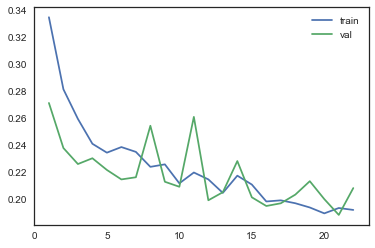

In [105]:
train_mse = round(mean_squared_error(y_train, model.predict(X_train)),4)
test_mse =  round(mean_squared_error(y_test, model.predict(X_test)),4)
print(len(history.history['loss']))
epochs = np.arange(len(history.history['val_loss']))
plt.plot(epochs[1:], (history.history['loss'][1:]), label='train')
plt.plot(epochs[1:], (history.history['val_loss'][1:]), label='val')
plt.legend()

In [106]:
print("\nTraining r2:", round(r2_score(y_train, model.predict(X_train)),4))
print("Test r2:", round(r2_score(y_test, model.predict(X_test)),4))
print("\nTraining MSE:",round(mean_squared_error(y_train, model.predict(X_train)),4))
print("Validation MSE:", round(mean_squared_error(y_test, model.predict(X_test)),4))


Training r2: 0.6811
Test r2: 0.6292

Training MSE: 0.1953
Validation MSE: 0.2082
